# Data Manipulation and Munging

# INSIGHTS
This Jupyter notebook includes some code to generate insights on what we learnt from the data. We will use a package called NLTK to perform sentiment analysis.

# Graphs and Plots
We will use Matplotlib and Seaborn libraries for the visualization

In [1]:
# Importing libraries
from nltk.sentiment import vader
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
import matplotlib.pyplot as plt
import requests
from collections import Counter
import pandas as pd
!pip install wordcloud


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/papa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /home/papa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 298.8 kB/s eta 0:00:00m eta 0:00:010:00:01


In [2]:
# Read in the reviews data from a CSV file
sentiment_analysis_df = pd.read_csv("sentiment_content.csv")

In [3]:
# an instance of SentimentIntensityAnalyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'SENTIMENT'
sentiment_analysis_df['SENTIMENT'] = sentiment_analysis_df['CONTENT'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
sentiment_analysis_df

,CONTENT,SENTIMENT
0,✅ Trip Verified | Customer Service does not e...,-0.7497
1,✅ Trip Verified | Another really great pair of...,0.9808
2,Not Verified | Our A380 developed a fault tax...,-0.6936
3,Not Verified | Horrible airline. Does not care...,-0.3997
4,✅ Trip Verified | My family and I have flown ...,0.9190
...,...,...
2997,This is not reflective of BA in general only t...,0.8388
2998,BA085 LHR to YVR 100315. Narrow seats without ...,-0.7379
2999,London to Budapest and back in Club class. Fir...,0.6958
3000,LHR-PISA-LHR. I have a house in Tuscany so fly...,0.9874


In [4]:
# Creating another new column called 'SENTIMENT_TYPE' that contains the type of sentiment of each review using nltk
# for each sentiment score in the 'SENTIMENT' column
sentiment_analysis_df['SENTIMENT_TYPE'] = sentiment_analysis_df['SENTIMENT'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )
sentiment_analysis_df

,CONTENT,SENTIMENT,SENTIMENT_TYPE
0,✅ Trip Verified | Customer Service does not e...,-0.7497,negative
1,✅ Trip Verified | Another really great pair of...,0.9808,positive
2,Not Verified | Our A380 developed a fault tax...,-0.6936,negative
3,Not Verified | Horrible airline. Does not care...,-0.3997,negative
4,✅ Trip Verified | My family and I have flown ...,0.9190,positive
...,...,...,...
2997,This is not reflective of BA in general only t...,0.8388,positive
2998,BA085 LHR to YVR 100315. Narrow seats without ...,-0.7379,negative
2999,London to Budapest and back in Club class. Fir...,0.6958,positive
3000,LHR-PISA-LHR. I have a house in Tuscany so fly...,0.9874,positive


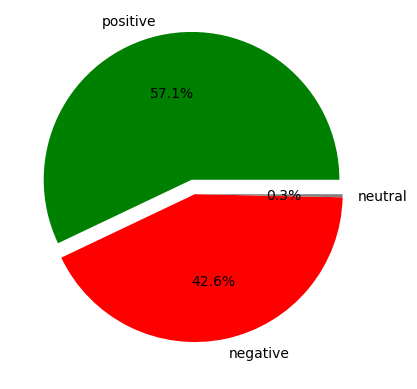

In [5]:
# calculate the percentage of each type of sentiment score
sentiment_type_percentages = sentiment_analysis_df['SENTIMENT_TYPE'].value_counts(normalize=True) * 100

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index, 
    colors=['green', 'red', 'grey'], 
    explode=[0.1, 0, 0], 
    autopct='%1.1f%%'
    )

plt.show()

# Sentiment

# Out of 3000 reviews, 1713 were positive, 1278 were negative and 9 were neutral. This means the majority of reviews were polarised as either positive or negative

/home/papa/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


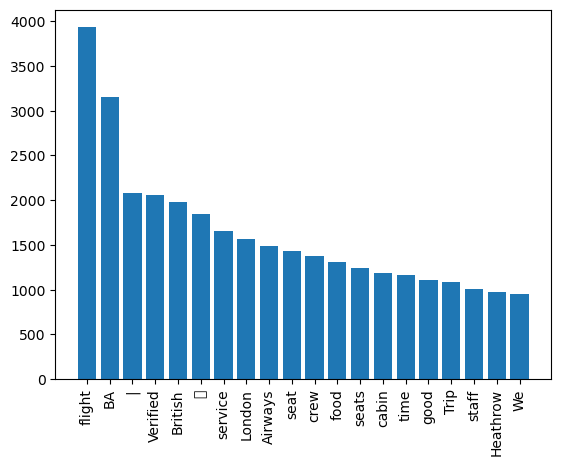

In [6]:
# The frequency chart shows the key topics within the 
# reviews showing what people are actively talking about their experience and staff

# Get the reviews from the dataframe
reviews = sentiment_analysis_df['CONTENT']

# Convert the reviews to a list of words
words = []
for review in reviews:
    words.extend(review.split())

# Filter out the stubborn stop words that don't want to disappear
stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word not in ['I', 'The','would','one','get','-']]

# Get the top 20 most used key words
word_counts = Counter(key_words)
top_20_words = word_counts.most_common(20)

# Filter out the stop words 
filtered_words = [
    (word, count) for word, count in top_20_words if word not in stopwords and word not in ['I', 'The','would','one','get','-']
    ]

# Get the labels and values for the histogram
labels, values = zip(*top_20_words)

# Create the histogram
plt.bar(labels, values)

# Set the x-axis labels to be vertical
plt.xticks(rotation=90)

#Display the plot
plt.show()

# Key Topics
The frequency chart below shows that the key topics within the reviews include “flight”, “London”, “service” and “crew”, showing that people are actively talking about their experience and staff

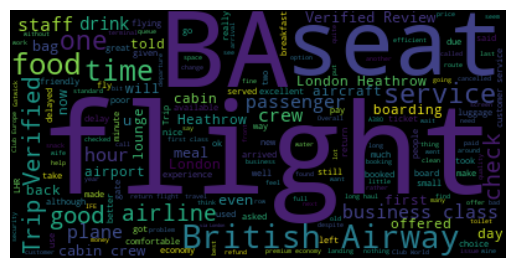

In [7]:
# Import the necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Create the wordcloud
wordcloud = WordCloud(random_state=42).generate(' '.join(sentiment_analysis_df['CONTENT']))

# Show the word cloud
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

# Key Topics
The word cloud also showed similar words and key topics within the reviews. This includes “flight”, “BA”, “seat” and “time”, showing that people are actively talking about their experience and staff